In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Assuming the data file will be in a 'data' subdirectory
try:
    df = pd.read_csv('../data/benin-malanville.csv')
    print("Data loaded successfully!")  # Add this line
    print(df.head()) #and this line
except FileNotFoundError:
    print("Make sure the data file for Benin is in the '../data/' directory.")
    # You might want to download or create a sample CSV here for testing
    # For now, let's assume you'll place it there.
    df = pd.DataFrame() # Create an empty DataFrame to avoid errors for now

Data loaded successfully!
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       

In [4]:
# Display summary statistics
print("Summary Statistics:")
print(df.describe())

# Missing Value Report
missing_values = df.isna().sum()
print("\nMissing Value Counts:")
print(missing_values)

# Identify columns with more than 5% missing values
total_rows = len(df)
high_missing_cols = missing_values[missing_values > 0.05 * total_rows]
if not high_missing_cols.empty:
    print("\nColumns with more than 5% missing values:")
    print(high_missing_cols)
else:
    print("\nNo columns with more than 5% missing values.")

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [5]:
# Outlier Detection and Basic Cleaning
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in cols_to_check:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[f'{col}_zscore'] = (df[col] - df[col].mean()) / df[col].std()

outlier_flag_col = 'is_outlier'
df[outlier_flag_col] = False
for col in cols_to_check:
    if f'{col}_zscore' in df.columns:
        df[outlier_flag_col] = df[outlier_flag_col] | (df[f'{col}_zscore'].abs() > 3)

print(f"\nNumber of outliers detected based on Z-score (|Z| > 3): {df[df[outlier_flag_col]].sum()}")
print("\nFirst few rows with outliers:")
print(df[df[outlier_flag_col]].head())

cols_to_impute = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in cols_to_impute:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Missing values in '{col}' imputed with median: {median_val}")

print("\nMissing value counts after imputation:")
print(df.isna().sum())

df.to_csv('../data/benin_clean.csv', index=False)
print("\nCleaned data exported to ../data/benin_clean.csv")


Number of outliers detected based on Z-score (|Z| > 3): Timestamp        2021-08-09 11:112021-08-09 11:122021-08-09 11:...
GHI                                                      4101646.0
DNI                                                      1444647.2
DHI                                                      2810246.4
ModA                                                     4004239.6
ModB                                                     3768940.8
Tamb                                                      235048.6
RH                                                        376881.4
WS                                                         45017.2
WSgust                                                     59051.9
WSstdev                                                     7952.2
WD                                                       1117316.9
WDstdev                                                    95207.1
BP                                                         7700689
Clean

C:\Users\girma\AppData\Local\Temp\ipykernel_10708\4048791494.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\girma\AppData\Local\Temp\ipykernel_10708\4048791494.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 


Cleaned data exported to ../data/benin_clean.csv


In [6]:
# Time Series Analysis
if 'Timestamp' in df.columns:
    try:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df.set_index('Timestamp', inplace=True)
    except Exception as e:
        print(f"Error converting 'Timestamp' column: {e}")
        # Handle the error appropriately, e.g., check the format
else:
    print("Error: 'Timestamp' column not found. Time series analysis cannot be performed.")
    # Skip the rest of this section if there's no Timestamp

if 'Timestamp' in df.index:
    plt.figure(figsize=(15, 8))
    plt.plot(df.index, df['GHI'], label='GHI')
    plt.plot(df.index, df['DNI'], label='DNI')
    plt.plot(df.index, df['DHI'], label='DHI')
    plt.plot(df.index, df['Tamb'], label='Temperature')
    plt.title('Solar Irradiance and Temperature Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

if 'Timestamp' in df.index:
    monthly_data = df[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()
    monthly_data.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Monthly Solar Irradiance and Temperature')
    plt.ylabel('Average Value')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

if 'Timestamp' in df.index:
    daily_patterns = df[['GHI', 'DNI', 'DHI', 'Tamb']].groupby(df.index.hour).mean()
    daily_patterns.plot(kind='line', figsize=(10, 6), marker='o')
    plt.title('Average Solar Irradiance and Temperature by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Value')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()


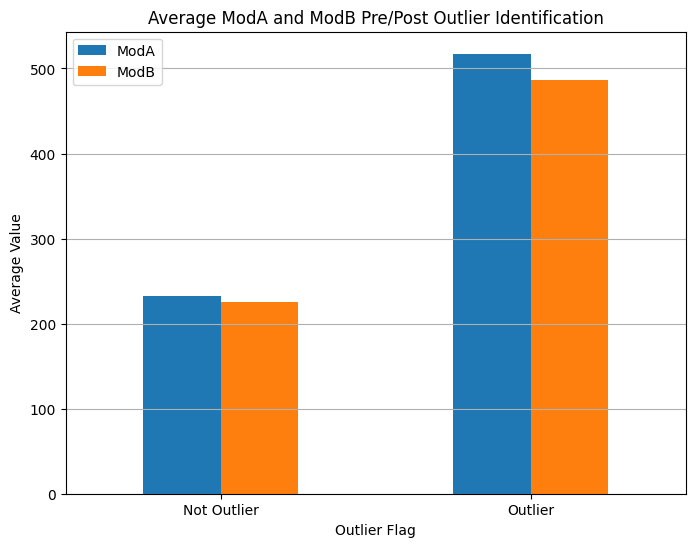

In [7]:
# Cleaning Impact
if 'is_outlier' in df.columns and 'ModA' in df.columns and 'ModB' in df.columns:
    cleaning_impact = df.groupby('is_outlier')[['ModA', 'ModB']].mean()
    cleaning_impact.plot(kind='bar', figsize=(8, 6))
    plt.title('Average ModA and ModB Pre/Post Outlier Identification')
    plt.ylabel('Average Value')
    plt.xlabel('Outlier Flag')
    plt.xticks(ticks=[False, True], labels=['Not Outlier', 'Outlier'], rotation=0)
    plt.grid(axis='y')
    plt.show()
else:
    print("Warning: Cannot plot cleaning impact. Ensure outlier flag and ModA/ModB columns exist.")

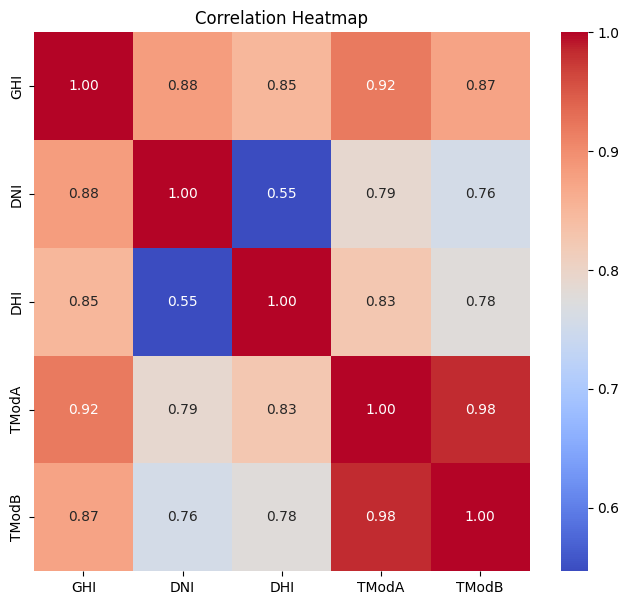

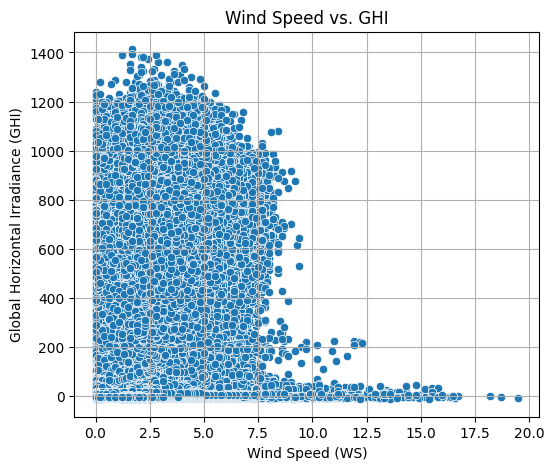

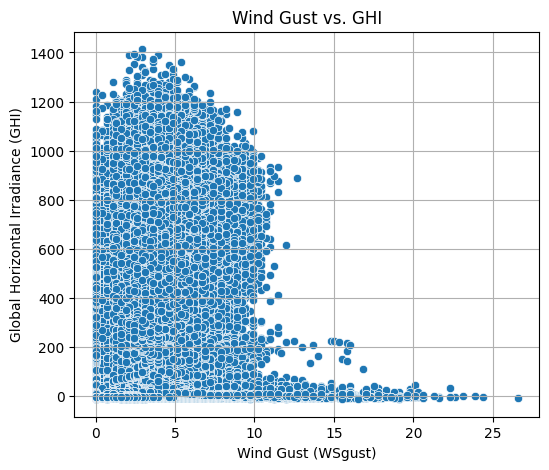

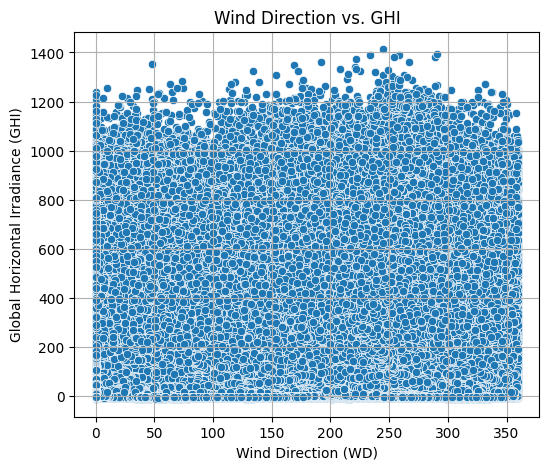

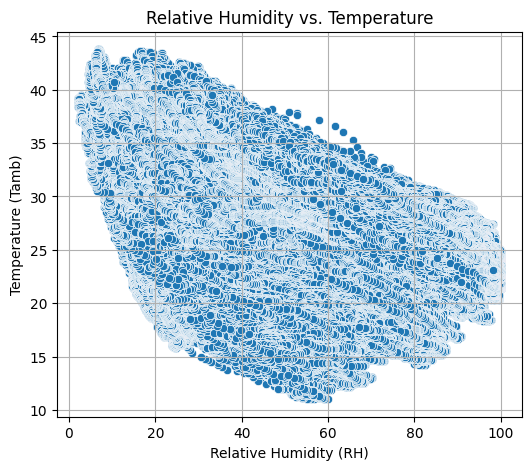

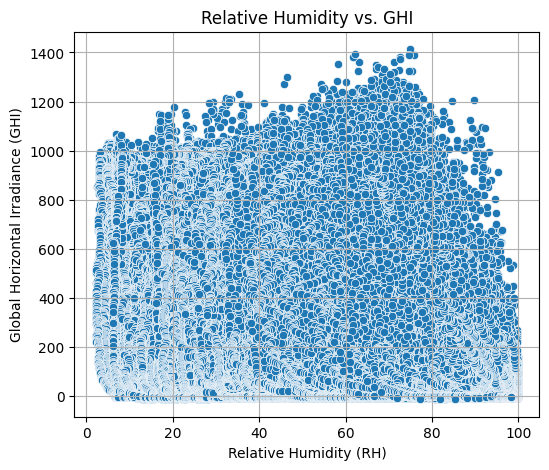

In [8]:
# Correlation & Relationship Analysis
cols_for_corr = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[cols_for_corr].corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

if 'WS' in df.columns and 'GHI' in df.columns:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x='WS', y='GHI', data=df)
    plt.title('Wind Speed vs. GHI')
    plt.xlabel('Wind Speed (WS)')
    plt.ylabel('Global Horizontal Irradiance (GHI)')
    plt.grid(True)
    plt.show()

if 'WSgust' in df.columns and 'GHI' in df.columns:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x='WSgust', y='GHI', data=df)
    plt.title('Wind Gust vs. GHI')
    plt.xlabel('Wind Gust (WSgust)')
    plt.ylabel('Global Horizontal Irradiance (GHI)')
    plt.grid(True)
    plt.show()

if 'WD' in df.columns and pd.api.types.is_numeric_dtype(df['WD']) and 'GHI' in df.columns:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x='WD', y='GHI', data=df)
    plt.title('Wind Direction vs. GHI')
    plt.xlabel('Wind Direction (WD)')
    plt.ylabel('Global Horizontal Irradiance (GHI)')
    plt.grid(True)
    plt.show()
elif 'WD' in df.columns:
    print("Note: 'WD' column is not numeric, cannot create a standard scatter plot against GHI.")

if 'RH' in df.columns and 'Tamb' in df.columns:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x='RH', y='Tamb', data=df)
    plt.title('Relative Humidity vs. Temperature')
    plt.xlabel('Relative Humidity (RH)')
    plt.ylabel('Temperature (Tamb)')
    plt.grid(True)
    plt.show()

if 'RH' in df.columns and 'GHI' in df.columns:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x='RH', y='GHI', data=df)
    plt.title('Relative Humidity vs. GHI')
    plt.xlabel('Relative Humidity (RH)')
    plt.ylabel('Global Horizontal Irradiance (GHI)')
    plt.grid(True)
    plt.show()


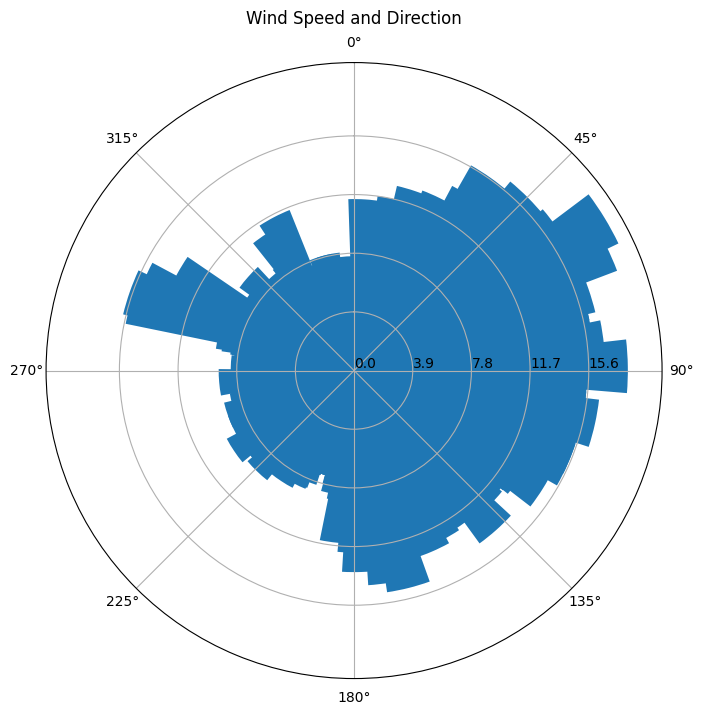

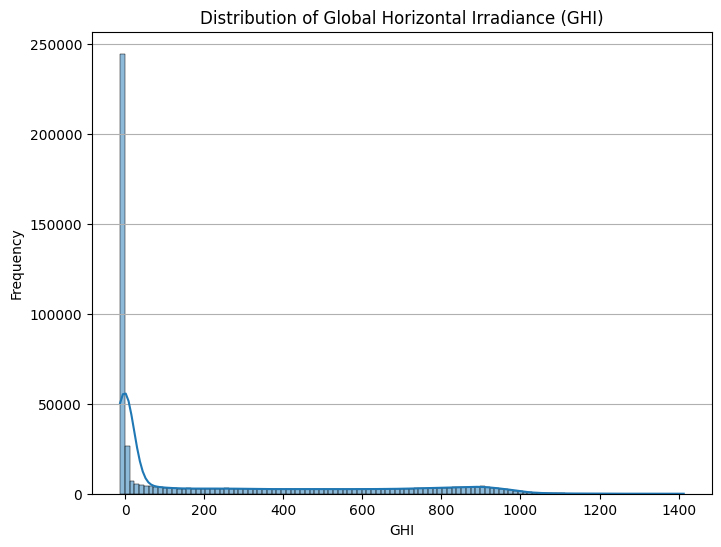

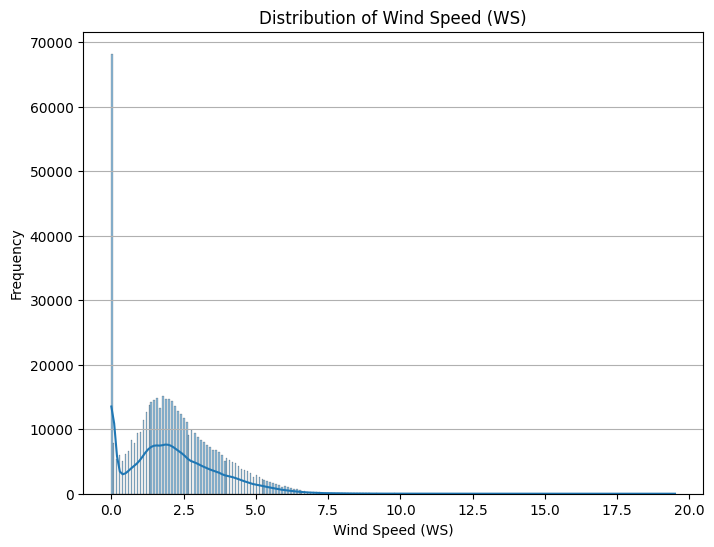

In [15]:
# Wind & Distribution Analysis
if 'WS' in df.columns and 'WD' in df.columns and pd.api.types.is_numeric_dtype(df['WD']):
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, projection='polar')
    theta = np.radians(df['WD'])
    c = ax.bar(theta, df['WS'], width=np.pi/16.0, bottom=0.0)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rticks(np.arange(0, df['WS'].max(), df['WS'].max()/5))
    ax.set_rlabel_position(90)
    ax.grid(True)
    ax.set_title("Wind Speed and Direction", va='bottom')
    plt.show()
elif 'WS' in df.columns and 'WD' in df.columns:
    print("Note: Cannot create a radial bar plot for wind. Ensure 'WD' is numeric.")

if 'GHI' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['GHI'], kde=True)
    plt.title('Distribution of Global Horizontal Irradiance (GHI)')
    plt.xlabel('GHI')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

if 'WS' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['WS'], kde=True)
    plt.title('Distribution of Wind Speed (WS)')
    plt.xlabel('Wind Speed (WS)')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

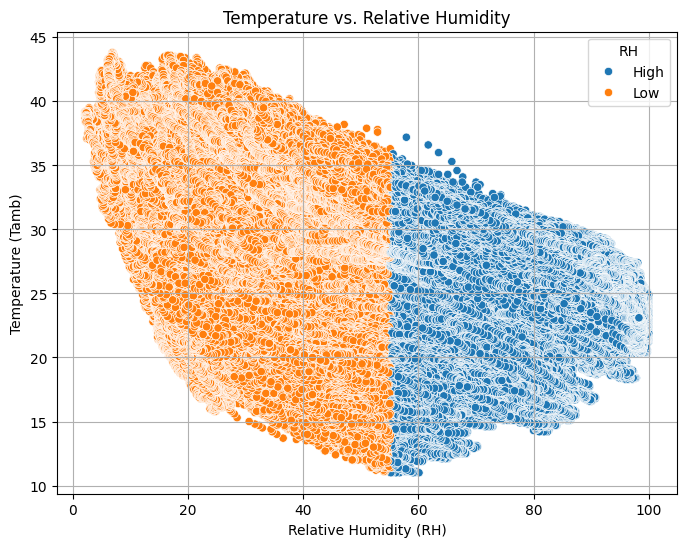

KeyboardInterrupt: 

<Figure size 800x600 with 0 Axes>

In [14]:
# Temperature Analysis
if 'RH' in df.columns and 'Tamb' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='RH', y='Tamb', hue=df['RH'].apply(lambda x: 'High' if x > df['RH'].median() else 'Low')) # Added data=df
    plt.title('Temperature vs. Relative Humidity')
    plt.xlabel('Relative Humidity (RH)')
    plt.ylabel('Temperature (Tamb)')
    plt.grid(True)
    plt.show()

if 'RH' in df.columns and 'GHI' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='RH', y='GHI', hue=df['RH'].apply(lambda x: 'High' if x > df['RH'].median() else 'Low')) # Added data=df
    plt.title('GHI vs. Relative Humidity')
    plt.xlabel('Relative Humidity (RH)')
    plt.ylabel('Global Horizontal Irradiance (GHI)')
    plt.grid(True)
    plt.show()



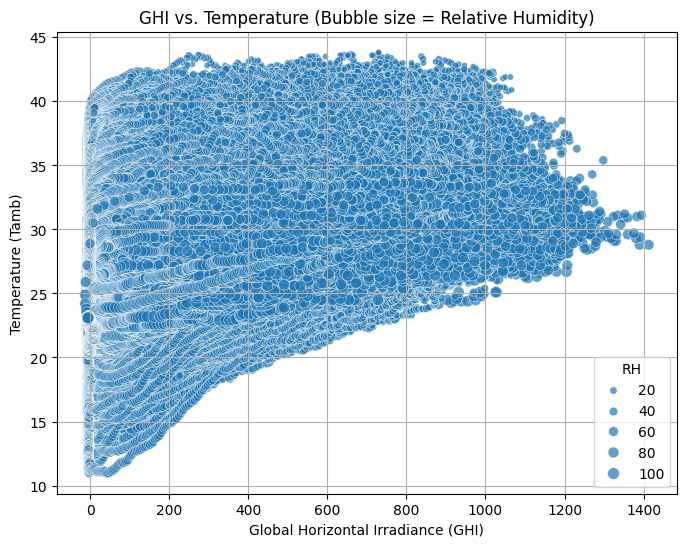

In [12]:
# Step 10: Bubble Chart
if 'GHI' in df.columns and 'Tamb' in df.columns and 'RH' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='GHI', y='Tamb', size='RH', alpha=0.7)  # Added data=df
    plt.title('GHI vs. Temperature (Bubble size = Relative Humidity)')
    plt.xlabel('Global Horizontal Irradiance (GHI)')
    plt.ylabel('Temperature (Tamb)')
    plt.grid(True)
    plt.show()
elif 'GHI' in df.columns and 'Tamb' in df.columns and 'BP' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='GHI', y='Tamb', size='BP', alpha=0.7) # Added data=df
    plt.title('GHI vs. Temperature (Bubble size = Barometric Pressure)')
    plt.xlabel('Global Horizontal Irradiance (GHI)')
    plt.ylabel('Temperature (Tamb)')
    plt.grid(True)
    plt.show()
else:
    print("Warning: Cannot create bubble chart.  Ensure GHI, Tamb, and either RH or BP columns exist.")